## Importando os dados

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base de dados imdb_movies.csv
base = pd.read_csv('imdb_movies.csv')

In [3]:
# Olhando as três primeiras linhas do dataframe
base.head(3)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU


## Analisando os dados

In [4]:
# Apagando as colunas date_x,overview,crew,orig_title,status,orig_lang
base_reduzida = base.drop(['date_x','overview','crew','orig_title','status','orig_lang'], axis=1)
base_reduzida.head()

,names,score,genre,budget_x,revenue,country
0,Creed III,73.0,"Drama, Action",75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,AU
3,Mummies,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,AU
4,Supercell,61.0,Action,77000000.0,3.409420e+08,US


In [5]:
# Informações sobre os dados
base_reduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   names     10178 non-null  object 
 1   score     10178 non-null  float64
 2   genre     10093 non-null  object 
 3   budget_x  10178 non-null  float64
 4   revenue   10178 non-null  float64
 5   country   10178 non-null  object 
dtypes: float64(3), object(3)
memory usage: 477.2+ KB


In [6]:
# Quantidade de valores vazios
base_reduzida.isnull().sum()

names        0
score        0
genre       85
budget_x     0
revenue      0
country      0
dtype: int64

In [7]:
# Apagando as linhas que possuem algum valor vazio
base_reduzida = base_reduzida.dropna()

In [8]:
# Vendo se ainda há algum valor vazio
base_reduzida.isnull().sum()

names       0
score       0
genre       0
budget_x    0
revenue     0
country     0
dtype: int64

In [9]:
# Vendo as informações novamente
base_reduzida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10093 entries, 0 to 10177
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   names     10093 non-null  object 
 1   score     10093 non-null  float64
 2   genre     10093 non-null  object 
 3   budget_x  10093 non-null  float64
 4   revenue   10093 non-null  float64
 5   country   10093 non-null  object 
dtypes: float64(3), object(3)
memory usage: 552.0+ KB


In [10]:
# Vendo um resumo estatístico
base_reduzida.describe()

,score,budget_x,revenue
count,10093.000000,1.009300e+04,1.009300e+04
mean,63.797186,6.434757e+07,2.521223e+08
std,12.879983,5.673124e+07,2.767152e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.458684e+07,2.800000e+07
50%,65.000000,5.000000e+07,1.508076e+08
75%,71.000000,1.040000e+08,4.169247e+08
max,100.000000,4.600000e+08,2.923706e+09


In [11]:
# Dimensões do dataframe (linha, coluna)
base_reduzida.shape

(10093, 6)

#### Filmes com o orçamento baixo e pontuação baixa não devem ser muito interessantes de se recomendar

In [12]:
# Salvando filmes com orçamento baixo e pontuação menor que 70 em uma variável
orcamento_baixo = base_reduzida[(base_reduzida['budget_x'] < 1000000) & (base_reduzida['score'] < 70)]
orcamento_baixo

,names,score,genre,budget_x,revenue,country
10,Winnie the Pooh: Blood and Honey,58.0,"Horror, Thriller",100000.0,3200000.0,AU
26,Shark Side of the Moon,53.0,"Action, Science Fiction, Thriller, Horror",10000.0,17887093.8,US
74,Terrifier 2,69.0,Horror,250000.0,12964783.0,AU
150,Savage Salvation,66.0,Thriller,85645.0,244880855.2,US
278,Whisper,64.0,"Horror, Thriller",20000.0,211802400.4,GB
...,...,...,...,...,...,...
9967,Maniac,61.0,Horror,350000.0,10000000.0,US
10021,The Reluctant Dragon,67.0,"Family, Animation, Comedy",600.0,216567758.4,US
10087,DADDY OWL!!!,0.0,"Drama, Thriller",1.0,1.0,AU
10088,The Haunting of La Llorona,56.0,Horror,500000.0,2301961.6,US


In [13]:
# Apagando os filmes salvos como tendo o orçamento baixo
base_reduzida = base_reduzida.drop(orcamento_baixo.index, axis=0)
base_reduzida

,names,score,genre,budget_x,revenue,country
0,Creed III,73.0,"Drama, Action",75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,AU
3,Mummies,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,AU
4,Supercell,61.0,Action,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...
10173,20th Century Women,73.0,Drama,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,54.0,Action,9145817.8,6.698361e+06,US
10175,The Russia House,61.0,"Drama, Thriller, Romance",21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,55.0,"Action, Adventure, Science Fiction, Thriller, ...",116000000.0,4.756613e+08,US


In [14]:
# Revendo a dimensão do dataframe
base_reduzida.shape

(9931, 6)

In [15]:
# Revendo as estatísticas do dataframe
base_reduzida.describe()

,score,budget_x,revenue
count,9931.000000,9.931000e+03,9.931000e+03
mean,63.908972,6.539181e+07,2.554242e+08
std,12.818305,5.659501e+07,2.775443e+08
min,0.000000,6.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.988234e+07
50%,66.000000,5.100000e+07,1.559313e+08
75%,72.000000,1.052000e+08,4.243763e+08
max,100.000000,4.600000e+08,2.923706e+09


Alguns filmes parecem apresentar erro na informação, pois possuem score maior ou igual a 60, porém a receita é igual a 0 (valor arrecado pelo filme), o que não parece fazer muito sentido. Esses dados precisam ser apagados.

In [16]:
# Salvando os filmes com receita menor que 1000 e score maior que 60 em uma variável
receita_baixa = base_reduzida[((base_reduzida['revenue'] >= 0) & (base_reduzida['revenue'] <= 1000)) & (base_reduzida['score'] >= 60)]
receita_baixa.head()

,names,score,genre,budget_x,revenue,country
83,Prey,78.0,"Thriller, Action, Science Fiction",65000000.0,0.0,AU
242,Hocus Pocus 2,74.0,"Fantasy, Comedy, Family",40000000.0,0.0,AU
429,Emancipation,80.0,Drama,120000000.0,0.0,US
463,After,72.0,"Romance, Drama",650000.0,0.0,AU
635,Extraction,73.0,"Drama, Action, Thriller",65000000.0,0.0,AU


In [17]:
# Revendo as dimensões do dataframe
base_reduzida.shape

(9931, 6)

In [18]:
# Apagando os dados com a receita baixa
base_reduzida = base_reduzida.drop(receita_baixa.index, axis=0)
base_reduzida.shape

(9877, 6)

In [19]:
# Revendo o resumo estatístico
base_reduzida.describe()

,score,budget_x,revenue
count,9877.000000,9.877000e+03,9.877000e+03
mean,63.882353,6.558599e+07,2.568207e+08
std,12.838520,5.661891e+07,2.776569e+08
min,0.000000,7.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,3.053566e+07
50%,66.000000,5.140000e+07,1.591851e+08
75%,72.000000,1.052000e+08,4.257325e+08
max,100.000000,4.600000e+08,2.923706e+09


#### Plotando histogramas das colunas score e budget_x

<AxesSubplot:>

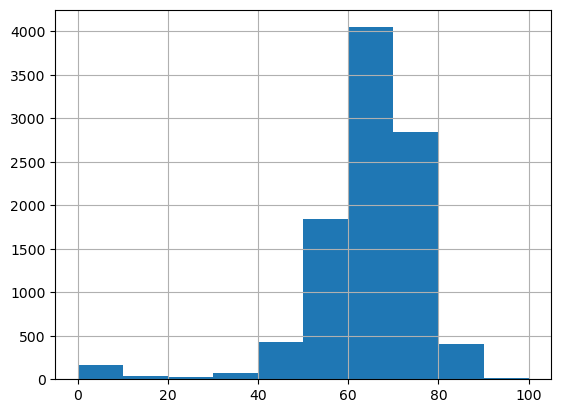

In [20]:
base_reduzida['score'].hist()

<AxesSubplot:>

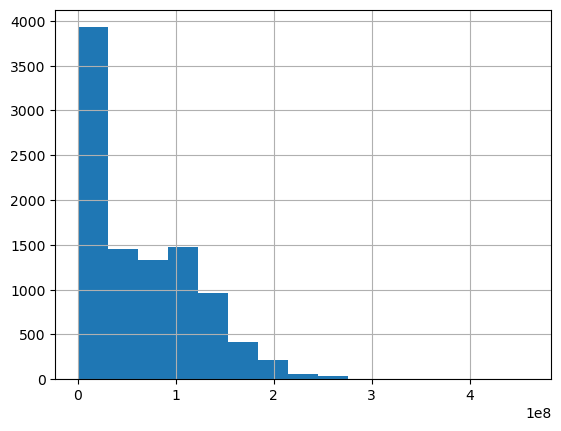

In [21]:
base_reduzida['budget_x'].hist(bins=15)

Alguns filmes parecem estar com os dados errados, pois possuem o orçamento (budget_x) muito baixo e receita muito alta. Eles também devem ser eliminados.

In [22]:
# Selecionando dados com orçamento menor ou igual a 100000
dados_parecem_errados = base_reduzida[base_reduzida['budget_x'] <= 100000]
dados_parecem_errados.head()

,names,score,genre,budget_x,revenue,country
192,20th Century Girl,83.0,"Romance, Drama",119.0,77132590.4,KR
318,The Good Neighbor,71.0,Thriller,105.0,94909.0,AU
1083,Ciao Alberto,75.0,"Animation, Comedy, Family, Fantasy",45223.0,57635198.8,US
1191,Facing the Giants,75.0,Drama,100000.0,10243159.0,US
2349,The Platform,70.0,"Drama, Science Fiction, Thriller",600.0,214883443.8,AU


In [23]:
# Revendo as dimensões do dataframe
base_reduzida.shape

(9877, 6)

In [24]:
# Apagando os dados que parecem estar errados
base_reduzida = base_reduzida.drop(dados_parecem_errados.index, axis=0)
base_reduzida.shape

(9855, 6)

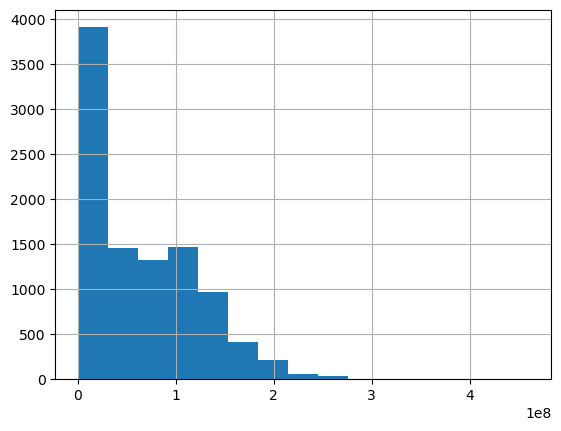

In [25]:
# Revendo o histograma de budget_x
base_reduzida['budget_x'].hist(bins=15);

In [26]:
# Revendo as informações estatísticas
base_reduzida.describe()

,score,budget_x,revenue
count,9855.000000,9.855000e+03,9.855000e+03
mean,63.858955,6.573230e+07,2.572752e+08
std,12.842230,5.659723e+07,2.777846e+08
min,0.000000,1.048800e+05,0.000000e+00
25%,59.000000,1.500000e+07,3.063423e+07
50%,65.000000,5.157160e+07,1.596163e+08
75%,72.000000,1.054000e+08,4.263404e+08
max,100.000000,4.600000e+08,2.923706e+09


In [27]:
# Revendo a base de dados
display(base_reduzida)

,names,score,genre,budget_x,revenue,country
0,Creed III,73.0,"Drama, Action",75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,AU
3,Mummies,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,AU
4,Supercell,61.0,Action,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...
10173,20th Century Women,73.0,Drama,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,54.0,Action,9145817.8,6.698361e+06,US
10175,The Russia House,61.0,"Drama, Thriller, Romance",21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,55.0,"Action, Adventure, Science Fiction, Thriller, ...",116000000.0,4.756613e+08,US


In [28]:
# Tipos de gêneros presentes na coluna genre
base_reduzida['genre'].unique()

array(['Drama,\xa0Action', 'Science Fiction,\xa0Adventure,\xa0Action',
       'Animation,\xa0Adventure,\xa0Family,\xa0Fantasy,\xa0Comedy', ...,
       'Adventure,\xa0Comedy,\xa0Family,\xa0Science Fiction,\xa0Action',
       'Mystery,\xa0Thriller,\xa0Comedy',
       'Action,\xa0Adventure,\xa0Science Fiction,\xa0Thriller,\xa0Horror'],
      dtype=object)

In [29]:
# Quantidade de gêneros
len(base_reduzida['genre'].unique())

2284

A quantidade de gêneros é extremamente alta: 2284, o que pode indicar um erro. Isso ocorreu porque os gêneros que possuem mesmo nome foram contabilizados mais de uma vez, como se fossem gêneros distintos. Porém, para fazer a recomendação de filmes, é necessário considerar que os gêneros com o mesmo nome são iguais. Uma estratégia para isso é criar uma coluna para cada tipo de gênero e, se o gênero estiver no respectivo filme, marcar como 1, se não estiver, marcar como zero.

In [30]:
# Lista contendo os gêneros mais comuns em filmes
generos_possiveis = ['Action','Adventure', 'Animation','Comedy','Family','Science Fiction','Western','Drama','Romance','Crime','History','Mystery','Horror']

In [31]:
# Preenchendo cada coluna de gêneros com zero, inicialmente
import numpy as np

base_reduzida[generos_possiveis] = np.zeros(shape=(base_reduzida.shape[0], len(generos_possiveis)), dtype=int)

In [32]:
# Se determinado gênero estiver presente no filme, deve-se colocar na respectiva coluna
for index_genero, genero in zip(base_reduzida.index, base_reduzida['genre']):
    for genero_criado in generos_possiveis:
        if genero_criado in genero:
            base_reduzida.loc[index_genero, genero_criado] = base_reduzida.loc[index_genero, genero_criado] + 1

In [33]:
# Mostrando o dataframe com as alterações efetuadas
base_reduzida

,names,score,genre,budget_x,revenue,country,Action,Adventure,Animation,Comedy,Family,Science Fiction,Western,Drama,Romance,Crime,History,Mystery,Horror
0,Creed III,73.0,"Drama, Action",75000000.0,2.716167e+08,AU,1,0,0,0,0,0,0,1,0,0,0,0,0
1,Avatar: The Way of Water,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,AU,1,1,0,0,0,1,0,0,0,0,0,0,0
2,The Super Mario Bros. Movie,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,AU,0,1,1,1,1,0,0,0,0,0,0,0,0
3,Mummies,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,AU,0,1,1,1,1,0,0,0,0,0,0,0,0
4,Supercell,61.0,Action,77000000.0,3.409420e+08,US,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,73.0,Drama,7000000.0,9.353729e+06,US,0,0,0,0,0,0,0,1,0,0,0,0,0
10174,Delta Force 2: The Colombian Connection,54.0,Action,9145817.8,6.698361e+06,US,1,0,0,0,0,0,0,0,0,0,0,0,0
10175,The Russia House,61.0,"Drama, Thriller, Romance",21800000.0,2.299799e+07,US,0,0,0,0,0,0,0,1,1,0,0,0,0
10176,Darkman II: The Return of Durant,55.0,"Action, Adventure, Science Fiction, Thriller, ...",116000000.0,4.756613e+08,US,1,1,0,0,0,1,0,0,0,0,0,0,1


In [34]:
# Apagando as colunas gênero, country, budget_x e revenue
base_reduzida = base_reduzida.drop(['genre','country','budget_x','revenue'], axis=1)
base_reduzida.head()

,names,score,Action,Adventure,Animation,Comedy,Family,Science Fiction,Western,Drama,Romance,Crime,History,Mystery,Horror
0,Creed III,73.0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,Avatar: The Way of Water,78.0,1,1,0,0,0,1,0,0,0,0,0,0,0
2,The Super Mario Bros. Movie,76.0,0,1,1,1,1,0,0,0,0,0,0,0,0
3,Mummies,70.0,0,1,1,1,1,0,0,0,0,0,0,0,0
4,Supercell,61.0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Sistema de recomendação de filmes

In [35]:
# Função para sortear os filmes que serão mostrados assim que o usuário logar pela primeira vez
def sortear_filmes_iniciais():
    indice_sorteado = np.random.choice(np.arange(base.shape[0]), 10,replace=False)
    print(base['names'][indice_sorteado])

In [36]:
# Sorteando os filmes
sortear_filmes_iniciais()

1067                         Matriarch
10095              Terms of Endearment
3579                The Skin I Live In
10173               20th Century Women
9315               Weekend at Bernie's
3346     Kingsglaive: Final Fantasy XV
8303                             Jesus
6952                         Snow Dogs
616          You Will Not Have My Hate
8283                   West Side Story
Name: names, dtype: object


In [37]:
filmes_assistidos = []

In [54]:
# Pedindo pra o usuário escolher um filme
indice_escolhido = int(input('Digite o índice do filme que você deseja assistir: '))
print('Ok, o filme escolhido foi', base['names'][indice_escolhido],'|',base['genre'][indice_escolhido])
filmes_assistidos.append(base['names'][indice_escolhido])

Digite o índice do filme que você deseja assistir: 2587
Ok, o filme escolhido foi Underwater | Horror, Science Fiction, Action, Adventure


In [55]:
# Adicionando 1 aos gêneros que o filme contempla para que estes tenham mais peso nas próximas recomendações
for genero_criado in generos_possiveis:
    if genero_criado in base['genre'][indice_escolhido]:
        base_reduzida.loc[indice_escolhido, genero_criado] += 1

In [56]:
# Informações do filme escolhido
base.iloc[indice_escolhido,:]

names                                                Underwater
date_x                                              01/23/2020 
score                                                      63.0
genre                Horror, Science Fiction, Action, Adventure
overview      After an earthquake destroys their underwater ...
crew          Kristen Stewart, Norah Price, Vincent Cassel, ...
orig_title                                           Underwater
status                                                 Released
orig_lang                                               English
budget_x                                             65000000.0
revenue                                              39177495.0
country                                                      AU
Name: 2587, dtype: object

In [57]:
# Selecionando as colunas que possuem gênero maior do que 1
base_reduzida[base_reduzida.iloc[:,2:] > 1].dropna(how='all', axis=0).dropna(how='all',axis=1)

,Action,Adventure,Science Fiction,Horror
1067,NaN,NaN,NaN,2.0
2587,2.0,2.0,2.0,2.0
3169,NaN,NaN,NaN,2.0


In [58]:
# Selecionando os nomes do gêneros recomendados
generos_recomendados = base_reduzida[base_reduzida.iloc[:,2:] > 1].dropna(how='all').dropna(how='all',axis=1).columns

In [59]:
# Lista com os índices do dataframe que possuem filmes recomendados
indices_recomendados = [] 

for row in base_reduzida.index:
    if np.all(base_reduzida.loc[row, generos_recomendados] >= 1):
        indices_recomendados.append(row)
        
for row in base_reduzida.index:
    if (np.any(base_reduzida.loc[row, generos_recomendados] >= 1)) and (row not in indices_recomendados):
        indices_recomendados.append(row)

In [60]:
# As colunas contendo os gêneros mais recomendados
colunas_mais_recomendadas = []
for i in base_reduzida.loc[indices_recomendados, :].iloc[:,2:].columns:
    if i in generos_recomendados:
        colunas_mais_recomendadas.append(i)

In [61]:
# Os dez filmes mais recomendados com base nos gêneros mais assistidos
base_reduzida.query("names != @filmes_assistidos").sort_values(by=colunas_mais_recomendadas, ascending=False)[0:10]

,names,score,Action,Adventure,Animation,Comedy,Family,Science Fiction,Western,Drama,Romance,Crime,History,Mystery,Horror
155,Kids vs. Aliens,60.0,1,1,0,0,0,1,0,0,0,0,0,0,1
1917,Resident Evil: Vendetta,69.0,1,1,1,0,0,1,0,0,0,0,0,1,1
2749,AVP: Alien vs. Predator,59.0,1,1,0,0,0,1,0,0,0,0,0,0,1
3277,Tremors: A Cold Day in Hell,60.0,1,1,0,1,0,1,0,0,0,0,0,0,1
4532,Tremors 5: Bloodlines,55.0,1,1,0,1,0,1,0,0,0,0,0,0,1
6003,Deep Rising,62.0,1,1,0,0,0,1,0,0,0,0,0,0,1
6448,Starship Troopers 2: Hero of the Federation,43.0,1,1,0,0,0,1,0,0,0,0,0,0,1
7153,Megalodon,46.0,1,1,0,0,0,1,0,0,0,0,0,0,1
7833,Sharknado,39.0,1,1,0,1,0,1,0,0,0,0,0,0,1
7943,Leviathan,59.0,1,1,0,0,0,1,0,0,0,0,0,0,1
